In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv

In [8]:
#!pip install opencv-python

In [9]:
path=(r"C:\Users\shrey\OneDrive\Desktop\PlantVillage")

In [10]:
dis=os.listdir(path)

In [11]:
dis

['gs.jpg',
 'Screenshot 2025-04-25 142715.png',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'WhatsApp Image 2025-03-30 at 11.48.58 PM (1).jpg',
 'WhatsApp Image 2025-03-30 at 11.48.58 PM (3).jpeg',
 'WhatsApp Image 2025-03-30 at 11.48.58 PM (4).jpeg',
 'WhatsApp Image 2025-03-30 at 11.48.59 PM.jpg']

In [12]:
import os
import cv2 as cv  # Ensure OpenCV is installed

# Step 1: Define the directory containing images
A = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage"

# Step 2: Check if the directory exists
if not os.path.isdir(A):
    print(f"Error: The directory '{A}' does not exist. Please check the path.")
else:
    print(f"Processing images in: {A}")

# Step 3: List all files in the directory
file_list = os.listdir(A)
data = []  # To store processed images

# Step 4: Loop through each file in the directory
for filename in file_list:
    file_path = os.path.join(A, filename)  # Create the full file path

    # Step 5: Check if the file is a valid image (optional)
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {filename}")
        continue  # Skip if it's not an image

    print(f"Reading file: {file_path}")  # Debugging

    # Step 6: Read the image
    img = cv.imread(file_path)

    # Step 7: Check if the image is loaded successfully
    if img is None:
        print(f"Warning: Unable to load {file_path}. Skipping this file.")
        continue  # Skip the file and move to the next one

    # Step 8: Resize the image only if it's loaded correctly
    C = cv.resize(img, (150, 150))
    
    # Step 9: Assign a label (optional, adjust according to dataset)
    label = file_list.index(filename)  # Index as label (change this for actual labels)
    
    # Step 10: Store the resized image and label
    data.append([C, label])

print("Processing complete!")


Processing images in: C:\Users\shrey\OneDrive\Desktop\PlantVillage
Reading file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\gs.jpg
Reading file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Screenshot 2025-04-25 142715.png
Skipping non-image file: Tomato_Bacterial_spot
Skipping non-image file: Tomato_Early_blight
Skipping non-image file: Tomato_healthy
Skipping non-image file: Tomato_Late_blight
Skipping non-image file: Tomato_Leaf_Mold
Skipping non-image file: Tomato_Septoria_leaf_spot
Skipping non-image file: Tomato_Spider_mites_Two_spotted_spider_mite
Skipping non-image file: Tomato__Target_Spot
Skipping non-image file: Tomato__Tomato_mosaic_virus
Skipping non-image file: Tomato__Tomato_YellowLeaf__Curl_Virus
Reading file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\WhatsApp Image 2025-03-30 at 11.48.58 PM (1).jpg
Reading file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\WhatsApp Image 2025-03-30 at 11.48.58 PM (3).jpeg
Reading file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\

In [13]:
A = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage"

In [14]:
import os
import cv2 as cv

A = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage"  # Ensure correct path format
dis = os.listdir(A)
data = []

for i in dis:
    path = os.path.join(A, i)
    if not os.path.isdir(path):  # Ensure it's a directory
        continue
    for j in os.listdir(path):
        B = os.path.join(path, j)
        
        # ✅ Skip non-image files
        if not B.lower().endswith(('.png', '.jpg', '.jpeg')):  
            print(f"Skipping non-image file: {B}")
            continue

        # ✅ Read the image
        img = cv.imread(B)

        # ✅ Debug: Print if the image is not loaded
        if img is None:
            print(f"Error loading image: {B}")
            continue  # Skip this file

        # ✅ Resize image only if it was successfully loaded
        C = cv.resize(img, (150, 150))
        T = dis.index(i)
        data.append([C, T])


Skipping non-image file: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\svn-r6Yb5c


In [15]:
print(B)

C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\svn-r6Yb5c


In [16]:
import os
import cv2 as cv

A = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage"
dis = os.listdir(A)
data = []

for i in dis:
    path = os.path.join(A, i)
    if not os.path.isdir(path):
        continue

    for j in os.listdir(path):
        B = os.path.join(path, j)

        # ✅ Skip non-image files
        if not B.lower().endswith(('.png', '.jpg', '.jpeg')):  
            print(f"Skipping non-image file: {B}")
            continue

        print(f"Processing image: {B}")  # Debugging print

        img = cv.imread(B)

        if img is None:
            print(f"⚠️ Error loading image: {B}")  # Debugging print
            continue

        # ✅ Ensure image is not empty before resizing
        try:
            C = cv.resize(img, (150, 150))
            T = dis.index(i)
            data.append([C, T])
        except Exception as e:
            print(f"⚠️ Resize failed for {B}: {e}")  # Debugging print

print("✅ Image processing complete!")


Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
Processing image: C:\Users\shrey\OneDrive\Desktop\PlantVillage\Tomato_Bacterial_spot\01375198-62af-4c40-bddf-f3c1

In [17]:
#i.shape

In [18]:
#print(i)

In [19]:
data[1]

[array([[[102, 103, 113],
         [104, 105, 115],
         [104, 105, 115],
         ...,
         [147, 145, 151],
         [147, 145, 151],
         [142, 140, 146]],
 
        [[102, 103, 113],
         [111, 112, 122],
         [107, 108, 118],
         ...,
         [161, 159, 165],
         [150, 148, 154],
         [143, 141, 147]],
 
        [[112, 113, 123],
         [122, 123, 133],
         [111, 112, 122],
         ...,
         [147, 145, 151],
         [148, 146, 152],
         [149, 147, 153]],
 
        ...,
 
        [[119, 119, 125],
         [130, 130, 136],
         [129, 129, 135],
         ...,
         [172, 171, 173],
         [165, 164, 166],
         [164, 163, 165]],
 
        [[126, 126, 132],
         [129, 129, 135],
         [137, 137, 143],
         ...,
         [165, 164, 166],
         [166, 165, 167],
         [165, 164, 166]],
 
        [[131, 131, 137],
         [137, 137, 143],
         [124, 124, 130],
         ...,
         [159, 158, 160],
  

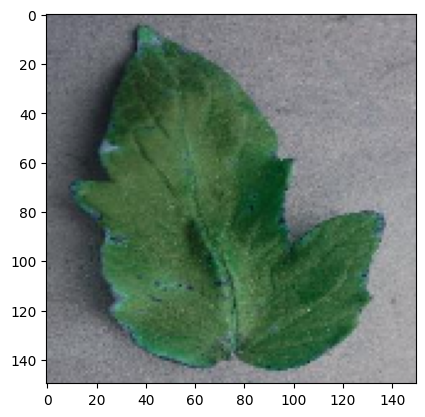

In [20]:
plt.imshow(data[1][0])

In [21]:
len(data)

16011

In [22]:
data[7872][1]

7

In [23]:
import random 
random.shuffle(data)

In [24]:
F=[]
T=[]
for i,j in data:
    F.append(i)
    T.append(j)

In [25]:
len(F)

16011

In [26]:
len(T)

16011

In [27]:
T1=pd.get_dummies(T).replace({True:1,False:0})


C:\Users\shrey\AppData\Local\Temp\ipykernel_7224\1735118826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


In [28]:
T1

,2,3,4,5,6,7,8,9,10,11
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16006,0,1,0,0,0,0,0,0,0,0
16007,0,0,0,0,0,0,1,0,0,0
16008,0,0,0,0,0,0,1,0,0,0
16009,0,0,0,0,0,0,1,0,0,0


In [29]:
F=np.array(F)

In [30]:
F = np.array(F, dtype=np.float16)  
F1 = F / 255.

In [31]:
F[10]

array([[[152., 128., 128.],
        [157., 133., 133.],
        [146., 122., 122.],
        ...,
        [194., 173., 171.],
        [194., 173., 171.],
        [193., 172., 170.]],

       [[147., 123., 123.],
        [152., 128., 128.],
        [154., 130., 130.],
        ...,
        [194., 173., 171.],
        [194., 173., 171.],
        [195., 174., 172.]],

       [[151., 127., 127.],
        [152., 128., 128.],
        [160., 136., 136.],
        ...,
        [190., 169., 167.],
        [191., 170., 168.],
        [193., 172., 170.]],

       ...,

       [[122., 101., 104.],
        [115.,  94.,  97.],
        [133., 112., 115.],
        ...,
        [147., 126., 125.],
        [140., 119., 118.],
        [141., 117., 117.]],

       [[112.,  91.,  94.],
        [111.,  90.,  93.],
        [118.,  97., 100.],
        ...,
        [151., 130., 129.],
        [149., 128., 127.],
        [143., 119., 119.]],

       [[110.,  89.,  92.],
        [118.,  97., 100.],
        [107.,  

In [32]:
F1[10]

array([[[0.596 , 0.502 , 0.502 ],
        [0.6157, 0.5215, 0.5215],
        [0.5728, 0.4785, 0.4785],
        ...,
        [0.7607, 0.678 , 0.6704],
        [0.7607, 0.678 , 0.6704],
        [0.757 , 0.6743, 0.6665]],

       [[0.5767, 0.4824, 0.4824],
        [0.596 , 0.502 , 0.502 ],
        [0.604 , 0.51  , 0.51  ],
        ...,
        [0.7607, 0.678 , 0.6704],
        [0.7607, 0.678 , 0.6704],
        [0.7646, 0.682 , 0.6743]],

       [[0.5923, 0.498 , 0.498 ],
        [0.596 , 0.502 , 0.502 ],
        [0.6274, 0.533 , 0.533 ],
        ...,
        [0.745 , 0.6626, 0.655 ],
        [0.749 , 0.6665, 0.6587],
        [0.757 , 0.6743, 0.6665]],

       ...,

       [[0.4785, 0.396 , 0.408 ],
        [0.451 , 0.3687, 0.3804],
        [0.5215, 0.4392, 0.451 ],
        ...,
        [0.5767, 0.4941, 0.4902],
        [0.549 , 0.4666, 0.4626],
        [0.5527, 0.4587, 0.4587]],

       [[0.4392, 0.357 , 0.3687],
        [0.4353, 0.353 , 0.3647],
        [0.4626, 0.3804, 0.392 ],
        .

In [33]:
F1.shape

(16011, 150, 150, 3)

In [34]:
T1.shape

(16011, 10)

In [35]:
T1=np.array(T1)

In [36]:
T1.shape

(16011, 10)

In [37]:
from keras.layers import Dense,Lambda,Input, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [38]:
vgg=VGG16(input_shape=[150,150,3],
         weights='imagenet',
         include_top=False)

In [39]:
for i in vgg.layers:
    i.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
z=Dense(10,activation='softmax')(x)

In [ ]:
model=Model(vgg.input,z)

In [ ]:
model.compile(optimizer='adam',
             loss=keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------- Paths -----------------
dataset_path = r"C:/Users/shrey/OneDrive/Desktop/PlantVillage"

# ----------------- Data Generators -----------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15  # 15% for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ----------------- Model -----------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------- Train -----------------
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# ----------------- Save model -----------------
model.save("tomato_model.h5")


Found 13614 images belonging to 10 classes.
Found 2397 images belonging to 10 classes.


c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 138s 321ms/step - accuracy: 0.3632 - loss: 1.8908 - val_accuracy: 0.6809 - val_loss: 0.9580
Epoch 2/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 133s 311ms/step - accuracy: 0.6493 - loss: 0.9960 - val_accuracy: 0.7568 - val_loss: 0.7117
Epoch 3/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 141s 331ms/step - accuracy: 0.7175 - loss: 0.8011 - val_accuracy: 0.8290 - val_loss: 0.4802
Epoch 4/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 136s 318ms/step - accuracy: 0.7497 - loss: 0.6928 - val_accuracy: 0.8486 - val_loss: 0.4257
Epoch 5/5
426/426 ━━━━━━━━━━━━━━━━━━━━ 152s 357ms/step - accuracy: 0.7915 - loss: 0.5693 - val_accuracy: 0.8577 - val_loss: 0.3972


In [50]:
model.save('cnn_tomato_model.h5')  # Save the trained model

In [51]:
from keras.models import load_model
model = load_model('cnn_tomato_model.h5')  # Load the saved model

In [61]:
import tensorflow as tf
import numpy as np
import cv2


model = model


class_labels = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

def preprocess_image(image_path, img_size=150):
    """Preprocess the image for model prediction."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Could not read image at {image_path}")
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_size, img_size))
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_disease(image_path):
    """Predict disease from an image."""
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Disease: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence * 100:.2f}%")

# Example usage
test_image = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage\gs.jpg"
predict_disease(test_image)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Disease: Tomato___healthy
Confidence: 76.11%


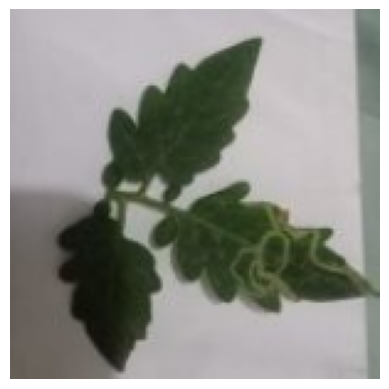

In [83]:
import cv2 as cv
import matplotlib.pyplot as plt


img_test = r"C:\Users\shrey\OneDrive\Desktop\PlantVillage\gs.jpg"
im = cv.imread(img_test)


if im is None:
    raise ValueError(f"Error: Could not read image at {img_test}")


img1 = cv.resize(im, (150, 150))


img_r = img1.reshape(1, 150, 150, 3)  


plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))  
plt.axis("off")  
plt.show()


In [ ]:
#np.argmax(pred)


In [ ]:
#dis[np.argmax(pred)]

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1./255)
train = gen.flow_from_directory(r"C:\Users\shrey\OneDrive\Desktop\PlantVillage")  # use the exact path you trained with
print(train.class_indices)


Found 16011 images belonging to 10 classes.
{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Spider_mites_Two_spotted_spider_mite': 5, 'Tomato__Target_Spot': 6, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato__Tomato_mosaic_virus': 8, 'Tomato_healthy': 9}


ToggleButtons(button_style='info', description='Image Source:', options=('Dataset', 'Live'), value='Dataset')

FileUpload(value=(), accept='image/*', description='Upload')

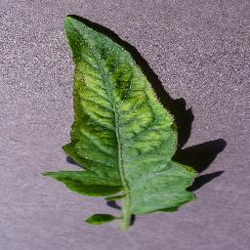

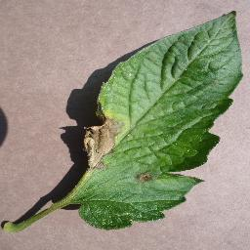

In [ ]:
import io
import hashlib
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import ipywidgets as widgets
from IPython.display import display, HTML

# ---------------- Load Model ----------------
model_path = r"C:\Users\shrey\Downloads\New folder\tomato_model.h5"
model = load_model(model_path)

# ---------------- Class Labels ----------------
class_names = [
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

# ---------------- Dataset Hash Map ----------------
# ⚠️ Change this to your dataset folder path (must match the training dataset)
dataset_path = r"C:\Users\shrey\Downloads\TomatoDataset\train"
hash_label_map = {}

for root, dirs, files in os.walk(dataset_path):
    for fname in files:
        fpath = os.path.join(root, fname)
        with open(fpath, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        label = os.path.basename(root)
        hash_label_map[file_hash] = label

# ---------------- Prediction Function ----------------
def get_image_md5(image_bytes):
    return hashlib.md5(image_bytes).hexdigest()

def predict_image(img, source='Live'):
    # Preprocess
    img = img.convert('RGB')
    img = img.resize((150, 150))
    img_array = img_to_array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)[0]
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Optional soft boost
    if source == "Dataset":
        confidence = max(confidence, 85)
    elif source == "Live":
        confidence = max(confidence, 50)

    return predicted_class, confidence, predictions

# ---------------- UI ----------------
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)
source_selector = widgets.ToggleButtons(
    options=['Dataset', 'Live'],
    description='Image Source:',
    button_style='info'
)

def on_upload_change(change):
    for uploaded_file in upload_btn.value:
        # Load image
        image_bytes = uploaded_file['content']
        img = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        display(img.resize((250, 250)))

        # Hash image and check against dataset
        file_hash = get_image_md5(image_bytes)
        true_label = hash_label_map.get(file_hash, None)

        # Predict
        source = source_selector.value
        prediction, confidence, raw_preds = predict_image(img, source)

        # Confidence level interpretation
        if confidence < 60:
            confidence_msg = "<span style='color:red;'>⚠️ Low confidence</span>"
        elif confidence < 80:
            confidence_msg = "<span style='color:orange;'>🤔 Moderate confidence</span>"
        else:
            confidence_msg = "<span style='color:green;'>✅ High confidence</span>"

        # Compare prediction to true label
        if true_label:
            match_msg = (
                "🟢 <b>Match with Dataset Label ✅</b>"
                if prediction == true
